##The Sparks Foundation **Task #1** 
#**Prediction Using Supervised ML**
### Level : Beginner

###Predicting percentage of an student based on the number of study hours.

###***Importing the libraries***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


###***Importing the dataset from URL***

In [3]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
df=pd.DataFrame(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###***Exploring the data***

In [ ]:
data.shape          #Dimension of our data

(25, 2)

In [4]:
data.isnull==True    #Checking missing values

False

In [5]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###***Data Visualization***

Text(0.5, 1.0, 'Scatterplot of Hours vs Score')

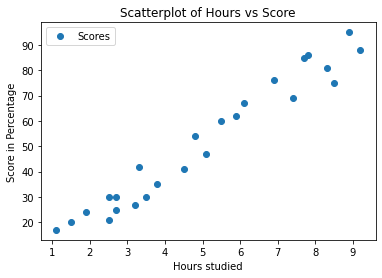

In [ ]:
data.plot(x='Hours', y='Scores', style='o')
plt.xlabel('Hours studied')
plt.ylabel('Score in Percentage')
plt.title('Scatterplot of Hours vs Score')

In [6]:
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
df.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


###***Splitting dataset into Training set and Test set***

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=0)

###***Training Simple Linear Regression Model on Training Set***

In [10]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)
#model fitting is done

LinearRegression()

###***Predicting Test set results***

In [11]:
y_pred=regressor.predict(x_test)

###***Visualising Training set results***

Text(0, 0.5, 'Score in Percentage')

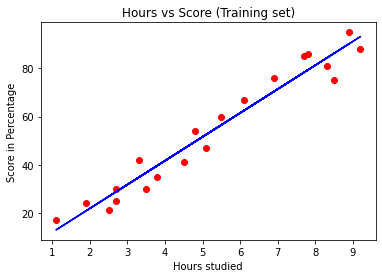

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Score in Percentage')


###***Visualising Test set results***


Text(0, 0.5, 'Score in Percentage')

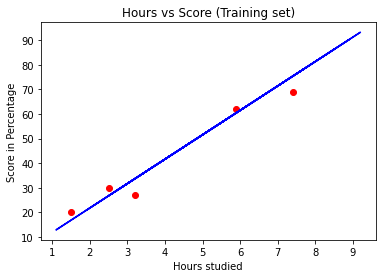

In [12]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Score in Percentage')

###***How well we fitted the model..***

In [13]:
compare=pd.DataFrame({'Actual Marks':y_test,'Predicted Marks':y_pred})
compare

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 value =', r2_score(y_test,y_pred))

Mean Absolute Error = 4.183859899002982
Mean Squared Error = 21.598769307217456
Root Mean Squared Error = 4.647447612100373
R^2 value = 0.9454906892105354


###***Implementing the Model***
####To find out student's score from his number of hours of study.If a student studies for 9.25 hrs/day, his score will be..

In [15]:
hrs=9.25
print('Number of hours =', hrs)
print('Percentage score =')
print(regressor.predict([[hrs]]))

Number of hours = 9.25
Percentage score =
[93.69173249]


##***Thank you !***